# IF3270 Machine Learning | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 20

Group Members:
- Bagas Sambega Rosyada (13522071)
- Raden Francisco Trianto B. (13522091)

## Import Libraries

In [44]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input
import gdown
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Function to display markdown
def print_markdown(md_text: str) -> None:
    display(Markdown(md_text))

## Import Dataset

In [45]:
# Load train images

def load_image_and_label(file_id, label):
    # Construct path using TF ops
    base_path = "images/images/train/"
    image_path = tf.strings.join([base_path, file_id])

    # Load and process image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])

    image = image / 255

    return image, label

In [3]:
url = "https://drive.google.com/uc?export=download&id=1zunh4CIiDpT-hyEkrtS5TFztCBWPUrpT"
output = 'dataset.zip'
gdown.download(url, output)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1zunh4CIiDpT-hyEkrtS5TFztCBWPUrpT
From (redirected): https://drive.google.com/uc?export=download&id=1zunh4CIiDpT-hyEkrtS5TFztCBWPUrpT&confirm=t&uuid=68d49231-6477-4524-b679-a646f54871b3
To: /content/dataset.zip
100%|██████████| 574M/574M [00:03<00:00, 186MB/s]


'dataset.zip'

In [4]:
!unzip -q dataset.zip

In [5]:
# Import dataset

df_train: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=12Oxl82yTOIzIAMowVEoK_xUm1OT_FRIw')
df_test: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=1kqgeZ6uhetW69DAljAmSE4vgtS4bKRX-')

In [6]:
df_train.head()

,Image,Species_Label
0,eceecd68-aae4-41b5-86fe-5a0b954b038e.jpg,0
1,224f5a7b-e6ad-479d-a6ae-a26812e4e038.jpg,0
2,461e8e5f-8221-441c-971a-aecfcaf05564.jpg,0
3,a62fab23-6107-46e5-aae0-7ff9bc0a2363.jpg,1
4,7e27f920-cecd-4d86-9e2a-9a667b14d787.jpg,1


In [7]:
df_test.head()

,Image
0,865918b6-015d-4070-a18f-a6957154662b.jpg
1,c33dfd7c-2a0b-43bc-b184-ad5bc71589d1.jpg
2,28d53db6-4caf-4de9-9624-c61ecfa00c49.jpg
3,b46a6481-33a3-42e8-9bfd-9c507e3dce63.jpg
4,645d8cc3-9f63-4a5f-82a8-cc5654fca714.jpg


In [8]:
target_col: str = 'Species_Label'

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis. Provide at least 2 analysis.

### 1. Data Shape

In [46]:
print("Train DataFrame Shape:", df_train.shape)
print("Test DataFrame Shape:", df_test.shape)

Train DataFrame Shape: (12500, 2)
Test DataFrame Shape: (12500, 1)


### 2. Label Distribution

<ipython-input-47-bc92cd8777e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='Species_Label', palette='viridis')


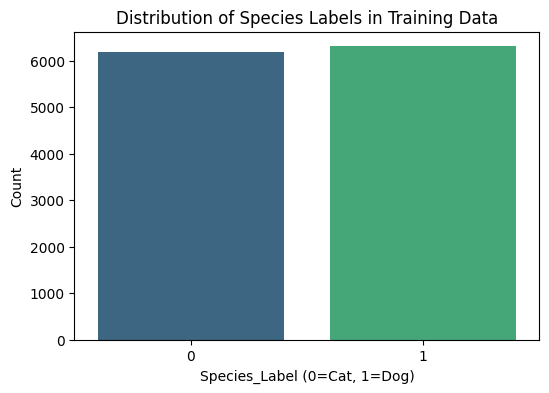

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='Species_Label', palette='viridis')
plt.title('Distribution of Species Labels in Training Data')
plt.xlabel('Species_Label (0=Cat, 1=Dog)')
plt.ylabel('Count')
plt.show()

### 3. Distribution of Image Sizes

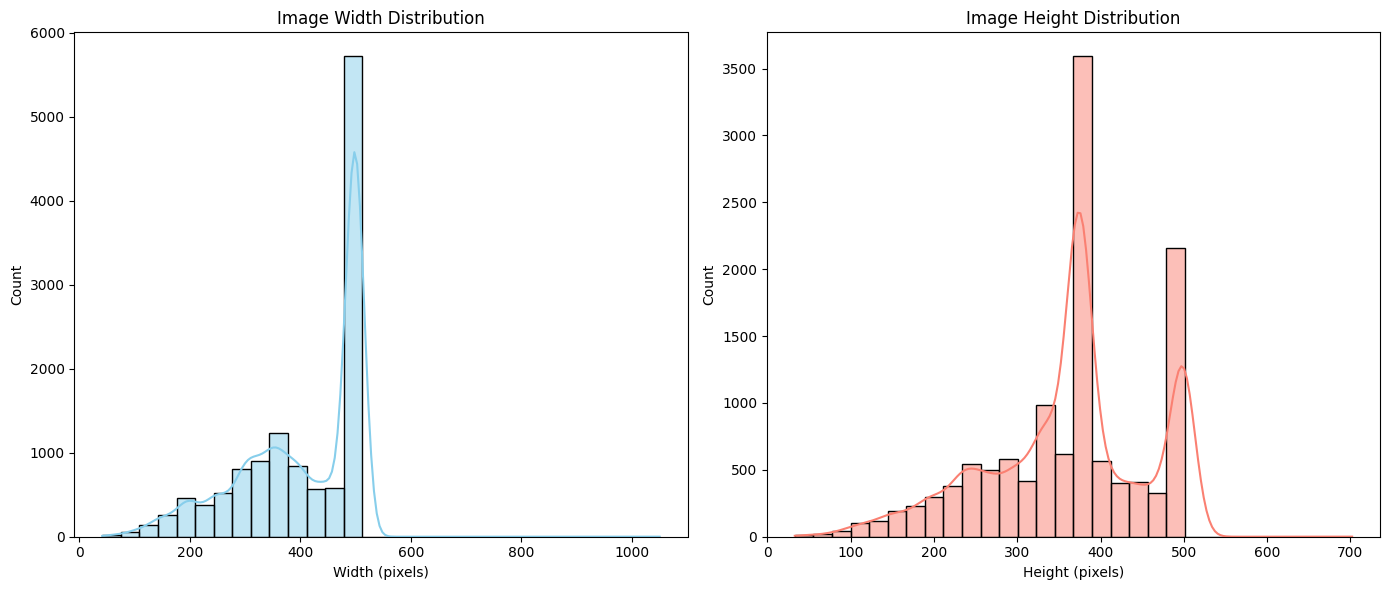

In [48]:
train_dir = "images/images/train"

image_files = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

dimensions = []

for image_file in image_files:
    image_path = os.path.join(train_dir, image_file)
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            dimensions.append({"filename": image_file, "width": width, "height": height})
    except Exception as e:
        print(f"Error opening {image_file}: {e}")

df_dimensions = pd.DataFrame(dimensions)
df_dimensions["area"] = df_dimensions["width"] * df_dimensions["height"]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_dimensions["width"], bins=30, kde=True, color='skyblue')
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")

plt.subplot(1, 2, 2)
sns.histplot(df_dimensions["height"], bins=30, kde=True, color='salmon')
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")

plt.tight_layout()
plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Holdout Split - train-test split (80/20)
train_df, val_df = train_test_split(
    df_train,
    test_size=0.2,
    stratify=df_train[target_col],
    random_state=42
)

train_df.shape, val_df.shape

((10000, 2), (2500, 2))

In [ ]:
train_df.head()

,Image,Species_Label
8826,bc2d433b-3bac-49a2-8302-0b6dd19c2bc0.jpg,1
8348,1ee9186f-bdb7-4db9-b585-527949572e79.jpg,0
5505,e599cea6-1454-48a0-9a9f-385f85f448ec.jpg,0
10021,105eccea-5a3b-4c43-9061-397b2f929b68.jpg,0
11992,cbb64705-4216-4a8e-82d5-d078dbde0372.jpg,1


# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

In [ ]:
# Write your code here

# Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [49]:
# We don't use pipelining

In [ ]:
# TensorFlow already using Pipeline

or create your own here

In [ ]:
# Write your code here

# 4. Modeling and Validation

Modeling is the process of building a machine learning model to solve a particular problem, or in the context of this task, predicting each class in an image using a `Convolutional Neural Network with AlexNet Architecture`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## 4.1 Convolutional Neural Network

You need to build and compare two models:
- Build your own model with AlexNet architecture using PyTorch/Tensorflow.
- Fine-tune a pretrained model (huggingface/roboflow)


### 4.1.1 Build Your Own Model

Convolutional Neural Network (CNN) is a type of artificial neural network specifically designed to process data that has a grid-like structure, such as images or digital pictures. AlexNet is one of the well-known CNN architectures due to its success in winning the ImageNet competition in 2012. AlexNet consists of several convolutional layers accompanied by pooling layers and fully connected layers, and it uses the ReLU activation function. Try to create your own CNN model with AlexNet architecture using PyTorch/Tensorflow.

In [30]:
# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (df_train["Image"].values, df_train["Species_Label"].values)  # Use "Image" instead of "File_ID"
).map(load_image_and_label).batch(32).prefetch(tf.data.AUTOTUNE)

In [32]:
# Calculate split sizes
train_size = int(0.6 * len(df_train))
val_size = len(df_train) - train_size

# Split the dataset
train_data = train_dataset.take(train_size)
val_data = train_dataset.skip(train_size)


In [33]:
def load_test_image(image_name):
    image_path = tf.strings.join(["images/images/test/", image_name])
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

test_dataset = tf.data.Dataset.from_tensor_slices(
    df_test["Image"].values
).map(load_test_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [50]:
model_ann = models.Sequential([
    # Conv1
    layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((3, 3), strides=2),
    layers.BatchNormalization(),

    # Conv2
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=2),
    layers.BatchNormalization(),

    # Conv3-5
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=2),

    # Dense
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output (cat=0, dog=1)
])

model_ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train with validation
history_ann = model_ann.fit(
    train_data,
    validation_data=val_data,
    epochs=3
)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 134s 311ms/step - accuracy: 0.4987 - loss: 1.2395
Epoch 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 368ms/step - accuracy: 0.4915 - loss: 0.6934
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 275ms/step - accuracy: 0.5021 - loss: 0.6933


In [ ]:
predictions = model_ann.predict(test_dataset)
predicted_labels = (predictions > 0.5).astype(int).flatten()

results_df = pd.DataFrame({
    'Image': df_test['Image'],
    'Species_Label': predicted_labels
})

results_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")
print(results_df.head())

391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 165ms/step
Predictions saved to predictions.csv
                                      Image  Species_Label
0  865918b6-015d-4070-a18f-a6957154662b.jpg              1
1  c33dfd7c-2a0b-43bc-b184-ad5bc71589d1.jpg              1
2  28d53db6-4caf-4de9-9624-c61ecfa00c49.jpg              1
3  b46a6481-33a3-42e8-9bfd-9c507e3dce63.jpg              1
4  645d8cc3-9f63-4a5f-82a8-cc5654fca714.jpg              1


### 4.1.2 Pretrained Model Fine-tuning

Aside from building your own CNN model, you can also fine-tune a pretrained model from platforms like Hugging Face or Roboflow. As a reference, you may use `ResNet50`, one of the most widely used pretrained CNN architectures.

In [36]:
# Load the pretrained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model so its weights don't get updated during training
base_model.trainable = False

# Add your own classification head for binary output
model_pretrain = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: 0=cat, 1=dog
])

# Compile the model
model_pretrain.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_pretrain.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [37]:
history_pretrain = model_pretrain.fit(
    train_data,
    validation_data=val_data,
    epochs=8
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 304ms/step - accuracy: 0.9574 - loss: 0.1105
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 316ms/step - accuracy: 0.9856 - loss: 0.0442
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 313ms/step - accuracy: 0.9880 - loss: 0.0347
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 296ms/step - accuracy: 0.9905 - loss: 0.0284
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 273ms/step - accuracy: 0.9905 - loss: 0.0258
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 275ms/step - accuracy: 0.9923 - loss: 0.0209
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 151s 298ms/step - accuracy: 0.9955 - loss: 0.0184
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 293ms/step - accuracy: 0.9929 - loss: 0.0200
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 299ms/step - accuracy: 0.9947 - loss: 0.0190
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 290ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 146s 373ms/step - accuracy: 0.9948 - loss: 0.0150
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 265ms/step - accuracy: 0.9932 - loss: 0.0167
Epoch 13/30
391/39

In [38]:
predictions = model_pretrain.predict(test_dataset)
predicted_labels = (predictions > 0.5).astype(int).flatten()

results_df = pd.DataFrame({
    'Image': df_test['Image'],
    'Species_Label': predicted_labels
})

results_df.to_csv('predictions_pretrained30.csv', index=False)
print("Predictions saved to predictions_pretrained30.csv")

391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step
Predictions saved to predictions_pretrained30.csv


In [12]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model so its weights don't get updated during training
base_model.trainable = False

# Add your own classification head for binary output
model_pretrain_basic = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: 0=cat, 1=dog
])

# Compile the model
model_pretrain_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [19]:
predictions = model_pretrain_basic.predict(test_dataset)
predicted_labels = (predictions > 0.5).astype(int).flatten()

results_df = pd.DataFrame({
    'Image': df_test['Image'],
    'Species_Label': predicted_labels
})

results_df.to_csv('predictions_pretrained_basic.csv', index=False)
print("Predictions saved to predictions_pretrained_basic.csv")

391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 105ms/step
Predictions saved to predictions_pretrained_basic.csv


## 4.2 Validation

Validation is the process of evaluating a trained model using a validation set or cross-validation method. It provides metrics that help determine the necessary steps for the next iteration of model development.  

For validation, the metric used is **macro f1-score**. A higher f1-score indicates better model calibration.  

### Required Validation Results  
The validation results that must be included in the notebook are:  
1. The validation results from the required baseline models.  
2. The validation results from the final submission model on **Kaggle**.  

In [41]:
from sklearn.metrics import confusion_matrix

y_true = df_train["Species_Label"]
y_pred = model_pretrain.predict(train_dataset)

y_pred = (y_pred > 0.5).astype(int).flatten()

391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step


In [43]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion")
print(cm)

tn, fp, fn, tp = cm.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

Confusion
[[6188    4]
 [   3 6305]]
True Negatives: 6188
False Positives: 4
False Negatives: 3
True Positives: 6305


In [ ]:
# The validation can be seen in the modelling section

# For the final submission, can be seen in

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set

In [ ]:
# Type your code here

# The submission can be seen in the modelling

# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

1. What is the error distribution between classes? Do most misclassifications come from one class?
2. Are there more false positives or false negatives?
3. Do occlusions or unusual angles contribute to errors?
4. Are the misclassifications random or do they follow a certain pattern?
5. etc..

1. Most misclassification is from the Dog class which is represented as the label 1.  This can be seen from the resulting prediction.

### 2. False Positives vs. False Negatives

After evaluating the model, we compared the classification errors by analyzing the confusion matrix.

True Negatives: 6188
False Positives: 4
False Negatives: 3
True Positives: 6305


This means that the False Positive and False Negative is relatively the same with the amount of False Positives is one more thatn the False Negative. This low amount could also indicate overfit of the model.


### 3. Unusual Angles

Based on the image that misclassified, most misclassified is from an image that having poor lighting or the color of the animal is similar to the background, and the animal feature that looksalike with another animal, like image of dogs that having thick fur like cat

### 4. Randomness of Misclassification

The misclassification mostly on the image that having another animal feature such as dogs that having fur like cat, etc

# 6. Insights

For each step you have done, do an analysis and mention the insights obtained.

Based on we work on,

EDA give us more understanding of the dataset, and we can understand features of images

We don't use pipeline since the TensorFlow model already provide pipeline for us (in the split)

Modelling give us information about how AlexNet CNN and pretrain model